In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
print('orginal wd:',os.getcwd())
os.chdir('/content/drive/MyDrive/MIS 695 PROJECT')
print('current wd:',os.getcwd())

orginal wd: /content
current wd: /content/drive/MyDrive/MIS 695 PROJECT


In [4]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
plt.rc('figure',figsize=(17,13))


nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chrissymo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chrissymo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIS 695 PROJECT/Food_Reviews.csv')

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
from datetime import datetime
df['date'] = df['Time'].apply(lambda x : datetime.fromtimestamp(x).strftime('%y-%m-%d'))
df = df.sort_values(by='date')
df = df.reset_index().drop(columns=['index'])
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,date
0,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,5,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,00-01-03
1,451949,B00004CXX9,A1048CYU0OV4O8,Judy L. Eans,2,2,5,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,00-01-09
2,374422,B00004CI84,A1048CYU0OV4O8,Judy L. Eans,2,2,5,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,00-01-09
3,230348,B00004RYGX,A1048CYU0OV4O8,Judy L. Eans,2,2,5,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,00-01-09
4,374343,B00004CI84,A1B2IZU1JLZA6,Wes,19,23,1,948240000,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",00-01-19


In [ ]:
df2 = df[["date","ProductId","Score","Text"]]
df2.head()

,date,ProductId,Score,Text
0,00-01-03,B00004CXX9,5,Beetlejuice is an excellent and funny movie. K...
1,00-01-09,B00004CXX9,5,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...
2,00-01-09,B00004CI84,5,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...
3,00-01-09,B00004RYGX,5,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...
4,00-01-19,B00004CI84,1,"I, myself always enjoyed this movie, it's very..."


In [ ]:
def clean_words(text):
    # convert to lowercase
    lowercase_text = text.lower()
    # remove non letters
    clean_text = re.sub(r"[^a-zA-Z0-9]", " ", lowercase_text)
    # return text
    return clean_text

In [ ]:
df2['clean_text'] = df2.Text.apply(lambda x : clean_words(x))
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2.clean_text = df2.clean_text.astype(str)
sid = SIA()
df2['sentiments']           = df2['clean_text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
df2['Positive Sentiment']   = df2['sentiments'].apply(lambda x: x['pos']) 
df2['Neutral Sentiment']    = df2['sentiments'].apply(lambda x: x['neu'])
df2['Negative Sentiment']   = df2['sentiments'].apply(lambda x: x['neg'])
df2['Compound']             = df2['sentiments'].apply(lambda x: x['compound'])
df2.drop(columns=['sentiments'],inplace=True)

df2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,date,ProductId,Score,Text,clean_text,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Compound
0,00-01-03,B00004CXX9,5,Beetlejuice is an excellent and funny movie. K...,beetlejuice is an excellent and funny movie k...,0.498,0.502,0.000,0.9829
1,00-01-09,B00004CXX9,5,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,this is one movie that should be in your movie...,0.142,0.858,0.000,0.4215
2,00-01-09,B00004CI84,5,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,this is one movie that should be in your movie...,0.142,0.858,0.000,0.4215
3,00-01-09,B00004RYGX,5,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,this is one movie that should be in your movie...,0.142,0.858,0.000,0.4215
4,00-01-19,B00004CI84,1,"I, myself always enjoyed this movie, it's very...",i myself always enjoyed this movie it s very...,0.162,0.743,0.095,0.6236


In [ ]:
df2.to_csv('food_reviews_sentiment_score.csv',index=False)

In [ ]:
len(df2)

568454

In [ ]:
df2 = pd.read_csv('food_reviews_sentiment_score.csv')

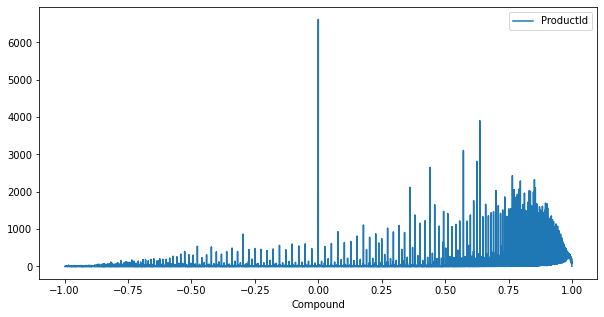

In [ ]:
df_compound = df2.groupby(by='Compound').count()
counts = df_compound['ProductId']
counts.to_frame().plot(figsize = (10,5))

In [ ]:
df3 = df2.sample(n = 100000)

In [ ]:
df3.Polarity.value_counts()

Positive    88875
Negative     9958
Neutral      1167
Name: Polarity, dtype: int64

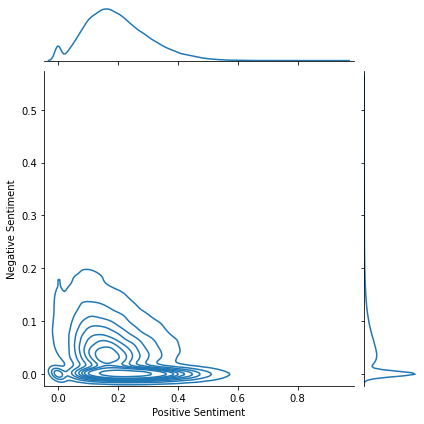

In [ ]:
sns.jointplot(data=df3, x='Positive Sentiment', y='Negative Sentiment', kind="kde")

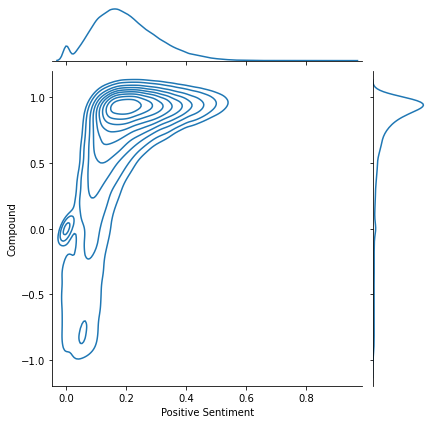

In [ ]:
sns.jointplot(data=df3, x='Positive Sentiment', y='Compound', kind="kde")

In [ ]:
polarity2 = []
for i in range(len(df2)):
    if df2['Negative Sentiment'][i] > 0.06:
      re = 'Negative'
    elif df2['Positive Sentiment'][i] > 0.3:
      re = 'Positive'
    else:
      re = 'Neutral' 
    polarity2.append(re)

In [ ]:
df2['Polarity2'] = polarity2

In [ ]:
df2['Polarity2'].value_counts()

Neutral     325791
Negative    160868
Positive     81795
Name: Polarity2, dtype: int64

In [ ]:
polarity = []
for i in range(len(df2)):
    if df2['Compound'][i] > 0.05:
      re = 'Positive'
    elif df2['Compound'][i] < -0.05:
      re = 'Negative'
    else:
      re = 'Neutral' 
    polarity.append(re)

In [ ]:
df2['Polarity'] = polarity
df2['Polarity'].value_counts()

Positive    502817
Negative     54015
Neutral      11622
Name: Polarity, dtype: int64

In [ ]:
df2.to_csv('food_reviews_polarity.csv',index=False)

In [5]:
df2 = pd.read_csv('food_reviews_polarity.csv')
df2

,date,ProductId,Score,Text,clean_text,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Compound,Polarity
0,00-01-03,B00004CXX9,5,Beetlejuice is an excellent and funny movie. K...,beetlejuice is an excellent and funny movie k...,0.498,0.502,0.000,0.9829,Positive
1,00-01-09,B00004CXX9,5,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,this is one movie that should be in your movie...,0.142,0.858,0.000,0.4215,Positive
2,00-01-19,B00004CI84,1,"I, myself always enjoyed this movie, it's very...",i myself always enjoyed this movie it s very...,0.162,0.743,0.095,0.6236,Positive
3,00-01-24,B00002N8SM,5,I bought a few of these after my apartment was...,i bought a few of these after my apartment was...,0.052,0.832,0.116,-0.6592,Negative
4,00-02-26,B00004RYGX,4,What happens when you say his name three times...,what happens when you say his name three times...,0.114,0.825,0.061,0.9398,Positive
...,...,...,...,...,...,...,...,...,...,...
393574,12-10-26,B000LNC3YM,5,The tea leaves arrived in perfect condition wi...,the tea leaves arrived in perfect condition wi...,0.113,0.786,0.101,-0.3506,Negative
393575,99-10-08,0006641040,5,this witty little book makes my son laugh at l...,this witty little book makes my son laugh at l...,0.100,0.875,0.024,0.7845,Positive
393576,99-10-25,0006641040,5,I can remember seeing the show when it aired o...,i can remember seeing the show when it aired o...,0.000,1.000,0.000,0.0000,Neutral
393577,99-12-02,B00004CXX9,5,Beetlejuice is a well written movie ..... ever...,beetlejuice is a well written movie ever...,0.339,0.661,0.000,0.8957,Positive


In [ ]:
#df2 = df2.drop_duplicates(subset = ['Text'])
#len(df2)

393579

In [ ]:
df2['Polarity'].value_counts()

Positive    349220
Negative     39426
Neutral       4933
Name: Polarity, dtype: int64

In [6]:
df_polarity = df2['Polarity'].value_counts().to_frame()

In [9]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Bar(y=df_polarity['Polarity'],x=df_polarity.index,name='Positive Sentiment Trend',text = df_polarity['Polarity']),
    row=1, col=1)

fig.update_yaxes(title_text="Review Counts")
fig.update_xaxes(title_text="Sentiment Polarity")
#fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_traces(textposition='outside')
fig.update_layout(height=650, width=900, title_text="Distribution of 3 Polarity Categories",font = dict(size = 15))

In [10]:
pos = df2[df2['Polarity'] == 'Positive']
neu = df2[df2['Polarity'] == 'Neutral']
neg = df2[df2['Polarity'] == 'Negative']

In [11]:
#from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['br'])

In [12]:
Positive_text = ' '.join(pos.clean_text)
Negative_text = ' '.join(neg.clean_text)

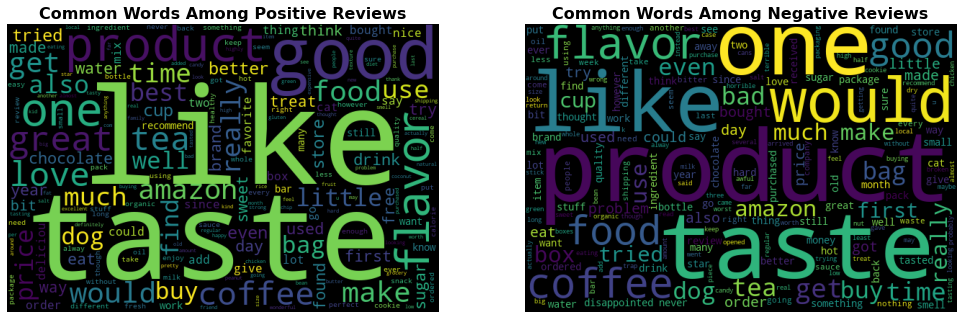

In [14]:
pwc = WordCloud(stopwords=stop_words,width=600,height=400,collocations = False,random_state=11).generate(Positive_text)
nwc = WordCloud(stopwords=stop_words,width=600,height=400,collocations = False,random_state=29).generate(Negative_text)

plt.subplot(1,2,1)
plt.title('Common Words Among Positive Reviews',fontsize=16,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Common Words Among Negative Reviews',fontsize=16,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()

In [ ]:
neg[neg.Score == 5].iloc[0].Text
#key finding: the score may not be accurate

'I bought a few of these after my apartment was infested with fruit flies. After only a few hours, the trap had &quot;attracted&quot; many flies and within a few days they were practically gone. This may not be a long term  solution, but if flies are driving you crazy, consider buying this. One  caution- the surface is very sticky, so try to avoid touching it.'

In [ ]:
neg[neg.Score == 5].iloc[23].Text

"Twenty four ropes per box, that's a lot of ropes!  At $18 per box, that makes out to 75 cents a rope.  Willie Wonka also has a tropical, limited edition, nerds rope candy and also a christmas edition which is quite clever and has a mostly cherry taste.  Unfortunately, Amazon doesn't sell those varieties.  Don't be surprised if you open a package and find the rope broken in one or more places.  Whad d'ya expect?  It's a nerds rope, and that's its disclaimer!"

# topic modelling

In [ ]:
!pip install pyLDAvis

In [25]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
#import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [4]:
df2 = pd.read_csv('food_reviews_polarity.csv')

In [9]:
df2 = df2.drop_duplicates(subset = ['Text'])
len(df2)

393579

In [10]:
df2.to_csv('food_reviews_polarity.csv',index=False)

In [11]:
pos = df2[df2['Polarity'] == 'Positive']
neu = df2[df2['Polarity'] == 'Neutral']
neg = df2[df2['Polarity'] == 'Negative']

In [49]:
from nltk.corpus import stopwords
stop_words_tm = stopwords.words('english')
stop_words_tm.extend(['br'])

In [105]:
data = pos.clean_text
#data = neu.clean_text
#data = neg.clean_text

In [106]:
len(data)

349220

In [107]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words_tm] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Create Dictionary
#id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_lemmatized)
id2word.filter_extremes(no_below=2, no_above=1.0) #filtering out words with very low frequencies from the dictionary

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]]


In [111]:
##look for the optimal topic number function

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                                num_topics=num_topics, 
                                                id2word=dictionary,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=20000,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


# negative topics

In [29]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=12, step=3)

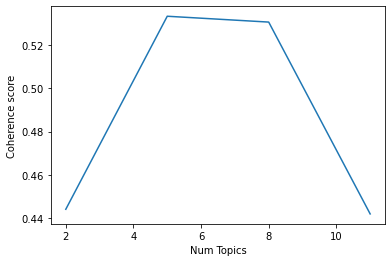

In [30]:
# DO NOT COVER THIS PART
# chunksize=1000,passes=10
limit=12; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.legend(("coherence_values"), loc='best')
plt.rcParams['font.size'] = '16'
plt.show()

In [31]:
# chunksize=10000,passes=10
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.444
Num Topics = 5  has Coherence Value of 0.5334
Num Topics = 8  has Coherence Value of 0.5307
Num Topics = 11  has Coherence Value of 0.4418


In [32]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [33]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.337972465024712

Coherence Score:  0.533436439683219


In [ ]:
pprint(lda_model.print_topics())

[(0,
  '0.056*"sugar" + 0.028*"add" + 0.027*"salt" + 0.025*"low" + 0.017*"snack" + '
  '0.017*"calorie" + 0.015*"soup" + 0.015*"protein" + 0.014*"cook" + '
  '0.013*"fat"'),
 (1,
  '0.033*"order" + 0.027*"bag" + 0.024*"buy" + 0.022*"box" + 0.022*"product" + '
  '0.019*"purchase" + 0.018*"package" + 0.017*"price" + 0.015*"get" + '
  '0.014*"receive"'),
 (2,
  '0.044*"bottle" + 0.040*"hot" + 0.032*"sauce" + 0.023*"plastic" + '
  '0.018*"water" + 0.016*"cup" + 0.015*"pod" + 0.014*"seal" + 0.013*"mess" + '
  '0.013*"leak"'),
 (3,
  '0.026*"use" + 0.018*"take" + 0.016*"go" + 0.016*"day" + 0.014*"time" + '
  '0.014*"work" + 0.013*"get" + 0.012*"problem" + 0.010*"br" + 0.009*"need"'),
 (4,
  '0.036*"trap" + 0.031*"baby" + 0.026*"formula" + 0.024*"set" + 0.022*"plant" '
  '+ 0.013*"catch" + 0.013*"dead" + 0.010*"tree" + 0.010*"grow" + '
  '0.009*"instruction"'),
 (5,
  '0.114*"product" + 0.024*"chocolate" + 0.022*"ingredient" + 0.015*"bar" + '
  '0.015*"cookie" + 0.015*"oil" + 0.015*"contain" 

In [35]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.106086 -0.070063       1        1  54.091625
1      0.211804 -0.007816       2        1  18.612528
2      0.041024 -0.230263       3        1  12.442197
4      0.025797  0.333928       4        1   8.822393
3     -0.384712 -0.025786       5        1   6.031257, topic_info=        Term          Freq         Total Category  logprob  loglift
286   coffee   7872.000000   7872.000000  Default  30.0000  30.0000
658       br  16346.000000  16346.000000  Default  29.0000  29.0000
139  product  17220.000000  17220.000000  Default  28.0000  28.0000
672      tea   5595.000000   5595.000000  Default  27.0000  27.0000
401     food   7523.000000   7523.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
832   smooth    349.686796    581.754453   Topic5  -5.3112   2.2992
109     work    517.522045   3178.810865   Topic5  -4.9192   0.9930
995    black    323.169304    917.860850   Topic5  -5.3900   1.7643
141      use    386.164041  10549.653745   Topic5  -5.2120  -0.4994
133   flavor    323.033589   8191.738255   Topic5  -5.3905  -0.4249

[284 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
338       1  0.999004  absolutely
196       1  0.995353         add
196       4  0.004442         add
1061      3  0.998210         ago
2681      4  0.997000     allergy
...     ...       ...         ...
178       3  0.000603       would
1345      5  0.995042        yard
111       1  0.191774        year
111       2  0.001665        year
111       3  0.806382        year

[390 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 5, 4])

In [36]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [37]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized)

In [38]:
df_topic_sents_keywords_neg = df_topic_sents_keywords

In [39]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords_neg['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

In [40]:
dict_keyword_prob = {}
for i in range(0,5):
    wp = lda_model.show_topic(i)
    dict_keyword_prob[i] = wp

In [41]:
dict_keywords = {}
for i in range(0,5):
    wp = lda_model.show_topic(i)
    topic_keywords = ", ".join([word for word, prop in wp])
    
    dict_keywords[i] = topic_keywords

In [42]:
neg_topic_dis = pd.DataFrame({"Topic_ counts":topic_counts,'percentage_contribution':topic_contribution},index = topic_counts.index)
neg_topic_dis = neg_topic_dis.reset_index()
neg_topic_dis = neg_topic_dis.rename(columns={'index':'Topic'})
neg_topic_dis['keywords'] = neg_topic_dis['Topic'].apply(lambda x : dict_keywords[x])
neg_topic_dis['keyword_prob'] = neg_topic_dis['Topic'].apply(lambda x : dict_keyword_prob[x])
neg_topic_dis

,Topic,Topic_ counts,percentage_contribution,keywords,keyword_prob
0,0.0,33300,0.8446,"taste, br, try, use, make, good, bad, flavor, ...","[(taste, 0.026338713), (br, 0.016448671), (try..."
1,1.0,4507,0.1143,"product, order, bag, box, purchase, buy, packa...","[(product, 0.042256985), (order, 0.033150136),..."
2,2.0,817,0.0207,"food, dog, day, problem, year, month, cat, wee...","[(food, 0.04516118), (dog, 0.0377229), (day, 0..."
3,4.0,505,0.0128,"br, product, ingredient, oil, contain, list, o...","[(br, 0.052470297), (product, 0.03913469), (in..."
4,3.0,297,0.0075,"coffee, tea, cup, trap, bean, weak, green, ble...","[(coffee, 0.11111767), (tea, 0.07897195), (cup..."


In [43]:
neg_topic_dis.to_csv('neg_topic_distribution_1104.csv')

In [ ]:
#neg_topic_dis = pd.read_csv('/Users/chrissymo/Documents/MSIS/research/with Vivian/COVID-19/vaccine tweets/DATA FOR PAPER/test_6_4/neg_topic_distribution_3categrories_0604.csv')

In [44]:
for i in range(len(neg_topic_dis)):
    print('Topic',neg_topic_dis['Topic'][i],':',neg_topic_dis['keywords'][i])

Topic 0.0 : taste, br, try, use, make, good, bad, flavor, would, buy
Topic 1.0 : product, order, bag, box, purchase, buy, package, price, receive, open
Topic 2.0 : food, dog, day, problem, year, month, cat, week, take, work
Topic 4.0 : br, product, ingredient, oil, contain, list, organic, ounce, high, salt
Topic 3.0 : coffee, tea, cup, trap, bean, weak, green, blend, pod, drink


In [ ]:
neg.Score.value_counts()

1    16221
5     8907
2     5872
3     4858
4     3568
Name: Score, dtype: int64

In [ ]:
pos.Score.value_counts()

5    239572
4     51929
3     24374
1     18899
2     14446
Name: Score, dtype: int64

## positive

In [112]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=12, step=3)

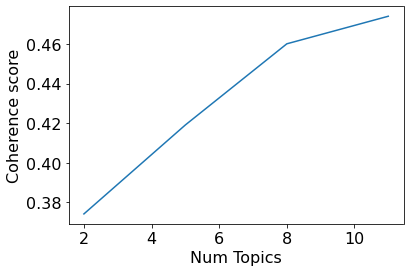

In [113]:
#chunksize=20000
limit=12; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.rcParams['font.size'] = '16'
#plt.legend(("coherence_values"))
plt.show()

In [114]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3741
Num Topics = 5  has Coherence Value of 0.4191
Num Topics = 8  has Coherence Value of 0.4601
Num Topics = 11  has Coherence Value of 0.474


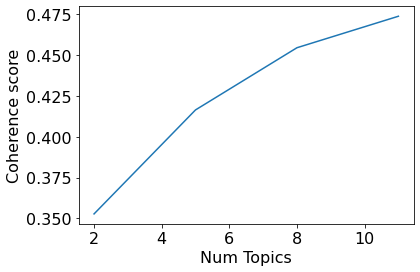

In [54]:
#chunksize=30000
limit=12; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.rcParams['font.size'] = '16'
#plt.legend(("coherence_values"))
plt.show()

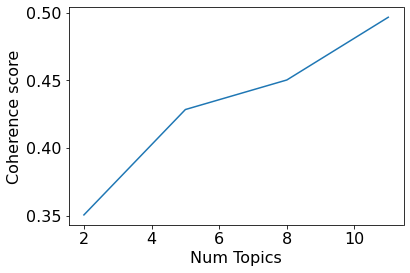

In [58]:
#chunksize=10000
limit=12; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.rcParams['font.size'] = '16'
#plt.legend(("coherence_values"))
plt.show()

In [115]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=11, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=20000,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [109]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.142923630009995

Coherence Score:  0.47403954785619534


In [110]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.120693  0.007484       1        1  19.312451
4      0.230194 -0.116245       2        1  11.928158
3      0.121804  0.043704       3        1  11.634416
8     -0.065725 -0.001276       4        1  11.138692
1     -0.077547 -0.061777       5        1   8.078520
6     -0.100598  0.020711       6        1   6.993493
5     -0.095852 -0.118890       7        1   6.936181
10     0.134577  0.085564       8        1   6.678677
7     -0.125018 -0.136018       9        1   6.148522
2     -0.051122  0.077478      10        1   6.016676
9     -0.091405  0.199264      11        1   5.134215, topic_info=         Term           Freq          Total Category  logprob  loglift
1137   coffee   92784.000000   92784.000000  Default  30.0000  30.0000
341       tea   87419.000000   87419.000000  Default  29.0000  29.0000
329      food   73113.000000   73113.000000  Default  28.0000  28.0000
984        br  185972.000000  185972.000000  Default  27.0000  27.0000
50        dog   47766.000000   47766.000000  Default  26.0000  26.0000
...       ...            ...            ...      ...      ...      ...
138      easy    4129.110217   25315.296345  Topic11  -4.9772   1.1559
134      also    4718.213195   55885.036423  Topic11  -4.8438   0.4974
1505  texture    3498.151912   15912.487230  Topic11  -5.1430   1.4544
51       find    4456.315053   83836.521424  Topic11  -4.9009   0.0347
180      even    3806.032340   45112.888089  Topic11  -5.0586   0.4967

[850 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
483       2  0.000126     add
483       4  0.055401     add
483       5  0.293062     add
483       6  0.153109     add
483       7  0.031378     add
...     ...       ...     ...
174      10  0.003227    year
174      11  0.075761    year
2666      8  0.002097   yeast
2666     11  0.997523   yeast
6285      3  0.998067  yorkie

[2133 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 4, 9, 2, 7, 6, 11, 8, 3, 10])

In [116]:
# FOR TEST

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized)

# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

dict_keyword_prob = {}
for i in range(0,11):
    wp = lda_model.show_topic(i)
    dict_keyword_prob[i] = wp
    

dict_keywords = {}
for i in range(0,11):
    wp = lda_model.show_topic(i)
    topic_keywords = ", ".join([word for word, prop in wp])
    
    dict_keywords[i] = topic_keywords
    
    
pos_topic_dis = pd.DataFrame({"Topic_ counts":topic_counts,'percentage_contribution':topic_contribution},index = topic_counts.index)
pos_topic_dis = pos_topic_dis.reset_index()
pos_topic_dis = pos_topic_dis.rename(columns={'index':'Topic'})
pos_topic_dis['keywords'] = pos_topic_dis['Topic'].apply(lambda x : dict_keywords[x])
pos_topic_dis['keyword_prob'] = pos_topic_dis['Topic'].apply(lambda x : dict_keyword_prob[x])
pos_topic_dis

KeyError: 8.0

In [117]:
dict_keyword_prob = {}
for i in range(0,11):
    wp = lda_model.show_topic(i)
    dict_keyword_prob[i] = wp
    

dict_keywords = {}
for i in range(0,11):
    wp = lda_model.show_topic(i)
    topic_keywords = ", ".join([word for word, prop in wp])
    
    dict_keywords[i] = topic_keywords
    
    
pos_topic_dis = pd.DataFrame({"Topic_ counts":topic_counts,'percentage_contribution':topic_contribution},index = topic_counts.index)
pos_topic_dis = pos_topic_dis.reset_index()
pos_topic_dis = pos_topic_dis.rename(columns={'index':'Topic'})
pos_topic_dis['keywords'] = pos_topic_dis['Topic'].apply(lambda x : dict_keywords[x])
pos_topic_dis['keyword_prob'] = pos_topic_dis['Topic'].apply(lambda x : dict_keyword_prob[x])
pos_topic_dis

,Topic,Topic_ counts,percentage_contribution,keywords,keyword_prob
0,0.0,92632,0.2653,"buy, order, product, price, find, good, store,...","[(buy, 0.027814258), (order, 0.025165662), (pr..."
1,8.0,47577,0.1362,"taste, chocolate, good, eat, bar, snack, flavo...","[(taste, 0.030868167), (chocolate, 0.02999005)..."
2,3.0,36768,0.1053,"love, get, go, time, treat, take, bag, work, d...","[(love, 0.018824203), (get, 0.018607918), (go,..."
3,5.0,28931,0.0828,"coffee, cup, flavor, taste, good, try, bean, s...","[(coffee, 0.11465941), (cup, 0.032275215), (fl..."
4,6.0,26806,0.0768,"sauce, flavor, taste, salt, good, hot, use, tr...","[(sauce, 0.028650405), (flavor, 0.024861863), ..."
5,1.0,24360,0.0698,"taste, water, drink, sugar, flavor, bottle, us...","[(taste, 0.0373188), (water, 0.03373218), (dri..."
6,7.0,22876,0.0655,"tea, flavor, taste, drink, green, good, try, b...","[(tea, 0.121868886), (flavor, 0.024648972), (t..."
7,10.0,18848,0.0540,"food, dog, cat, eat, love, good, treat, ingred...","[(food, 0.084944814), (dog, 0.043918602), (cat..."
8,9.0,18820,0.0539,"make, free, mix, use, gluten, bread, good, gre...","[(make, 0.040345088), (free, 0.031087749), (mi..."
9,2.0,16804,0.0481,"use, oil, hair, make, add, cook, soup, rice, c...","[(use, 0.035065915), (oil, 0.02546092), (hair,..."


In [118]:
pos_topic_dis.to_csv('pos_topic_distribution_1105.csv')

In [ ]:
#pos_topic_dis = pd.read_csv('/Users/chrissymo/Documents/MSIS/research/with Vivian/COVID-19/vaccine tweets/DATA FOR PAPER/test_6_4/pos_topic_distribution_3categrories_0604_v2.csv')

In [119]:
for i in range(len(pos_topic_dis)):
    print('Topic',pos_topic_dis['Topic'][i],':',pos_topic_dis['keywords'][i])

Topic 0.0 : buy, order, product, price, find, good, store, great, love, purchase
Topic 8.0 : taste, chocolate, good, eat, bar, snack, flavor, cookie, sweet, love
Topic 3.0 : love, get, go, time, treat, take, bag, work, day, keep
Topic 5.0 : coffee, cup, flavor, taste, good, try, bean, strong, make, use
Topic 6.0 : sauce, flavor, taste, salt, good, hot, use, try, make, cheese
Topic 1.0 : taste, water, drink, sugar, flavor, bottle, use, add, milk, make
Topic 7.0 : tea, flavor, taste, drink, green, good, try, bag, make, strong
Topic 10.0 : food, dog, cat, eat, love, good, treat, ingredient, feed, try
Topic 9.0 : make, free, mix, use, gluten, bread, good, great, taste, product
Topic 2.0 : use, oil, hair, make, add, cook, soup, rice, coconut, water
Topic 4.0 : br, product, review, say, may, amazon, www, read, energy, know


## Product Level sentiment and topics

In [15]:
product = df2.ProductId.value_counts()[:10].to_frame()

In [16]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Bar(y=product['ProductId'],x=product.index,name='Top 10 Product Review Counts',text = product['ProductId']),
    row=1, col=1)

fig.update_yaxes(title_text="Review Counts")
fig.update_xaxes(title_text="Product ID")
#fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_traces(textposition='outside')
fig.update_layout(height=650, width=900, title_text="Distribution of Top 10 Products",font = dict(size = 15))

In [18]:
p1 = df2[df2.ProductId == 'B007JFMH8M']
p1.head()

,date,ProductId,Score,Text,clean_text,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Compound,Polarity
338017,12-07-09,B007JFMH8M,5,I got one package (one cookie) in my Mom VoxBo...,i got one package one cookie in my mom voxbo...,0.157,0.843,0.0,0.5994,Positive
338019,12-07-09,B007JFMH8M,5,This is a very tasty cookie!!!!! I really enjo...,this is a very tasty cookie i really enjo...,0.401,0.599,0.0,0.8932,Positive
338023,12-07-09,B007JFMH8M,4,I recieved one as a sample but I will now be b...,i recieved one as a sample but i will now be b...,0.211,0.789,0.0,0.7469,Positive
338028,12-07-09,B007JFMH8M,5,I rec'd this product from influenster and Quak...,i rec d this product from influenster and quak...,0.142,0.858,0.0,0.8720,Positive
338029,12-07-09,B007JFMH8M,5,These cookies are so delicious.. I received on...,these cookies are so delicious i received on...,0.288,0.712,0.0,0.9070,Positive


In [19]:
p1.Polarity.value_counts()

Positive    890
Negative     18
Neutral       1
Name: Polarity, dtype: int64

In [57]:
p1_neg = p1[p1.Polarity == 'Negative']
p1_pos = p1[p1.Polarity == 'Positive']

In [64]:
print(len(p1_neg))
print(len(p1_pos))

18
890


In [88]:
#data = p1_neg.clean_text
#data = p1_pos.clean_text

#data = p2_pos.clean_text
#data = p2_neg.clean_text

#data = p3_pos.clean_text
data = p3_neg.clean_text


In [89]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words_tm] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Create Dictionary
#id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_lemmatized)
id2word.filter_extremes(no_below=2, no_above=1.0) #filtering out words with very low frequencies from the dictionary

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]


In [90]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=1, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [91]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.5416128664305715

Coherence Score:  0.2632513955968667


In [56]:
#negative
pprint(lda_model.print_topics())

[(0,
  '0.101*"cookie" + 0.059*"maybe" + 0.037*"soft" + 0.033*"would" + '
  '0.029*"good" + 0.029*"dry" + 0.029*"give" + 0.028*"try" + 0.028*"get" + '
  '0.028*"taste"')]


In [62]:
#positive
pprint(lda_model.print_topics())

[(0,
  '0.076*"good" + 0.045*"make" + 0.037*"love" + 0.035*"snack" + 0.034*"great" '
  '+ 0.027*"really" + 0.027*"go" + 0.020*"cookie" + 0.019*"kid" + '
  '0.018*"also"'),
 (1,
  '0.034*"would" + 0.024*"dry" + 0.024*"raisin" + 0.024*"calorie" + '
  '0.021*"baked" + 0.021*"ingredient" + 0.020*"enough" + 0.019*"think" + '
  '0.018*"give" + 0.017*"pretty"'),
 (2,
  '0.159*"cookie" + 0.053*"soft" + 0.049*"oatmeal" + 0.036*"taste" + '
  '0.028*"raisin" + 0.024*"eat" + 0.021*"try" + 0.018*"well" + 0.017*"package" '
  '+ 0.016*"product"')]


In [65]:
p2 = df2[df2.ProductId == 'B003B3OOPA']
p2_neg = p2[p2.Polarity == 'Negative']
p2_pos = p2[p2.Polarity == 'Positive']

In [66]:
print(len(p2_neg))
print(len(p2_pos))

33
582


In [71]:
#positive
pprint(lda_model.print_topics())

[(0,
  '0.052*"make" + 0.030*"butter" + 0.027*"much" + 0.017*"healthy" + '
  '0.014*"container" + 0.013*"amount" + 0.013*"add" + 0.012*"seem" + '
  '0.012*"small" + 0.010*"consume"'),
 (1,
  '0.065*"oil" + 0.054*"use" + 0.050*"coconut" + 0.036*"hair" + '
  '0.027*"product" + 0.022*"skin" + 0.021*"great" + 0.019*"good" + '
  '0.017*"love" + 0.013*"taste"'),
 (2,
  '0.046*"fat" + 0.024*"energy" + 0.024*"take" + 0.020*"thing" + '
  '0.016*"protein" + 0.015*"tablespoon" + 0.015*"heal" + 0.013*"study" + '
  '0.010*"couple" + 0.009*"seed"')]


In [78]:
#negative
pprint(lda_model.print_topics())

[(0,
  '0.047*"use" + 0.044*"hair" + 0.043*"oil" + 0.040*"skin" + 0.026*"feel" + '
  '0.026*"coconut" + 0.023*"product" + 0.018*"smooth" + 0.014*"week" + '
  '0.014*"dry"')]


In [81]:
p3 = df2[df2.ProductId == 'B001EO5Q64']
p3_neg = p3[p3.Polarity == 'Negative']
p3_pos = p3[p3.Polarity == 'Positive']

In [82]:
print(len(p3_neg))
print(len(p3_pos))

21
540


In [87]:
#positive
pprint(lda_model.print_topics())

[(0,
  '0.069*"oil" + 0.064*"use" + 0.049*"coconut" + 0.028*"product" + '
  '0.023*"skin" + 0.021*"great" + 0.021*"hair" + 0.018*"love" + 0.016*"taste" '
  '+ 0.013*"also"'),
 (1,
  '0.066*"good" + 0.028*"buy" + 0.023*"price" + 0.019*"look" + '
  '0.017*"purchase" + 0.015*"nutiva" + 0.014*"bake" + 0.013*"pack" + '
  '0.012*"organic" + 0.011*"plastic"'),
 (2,
  '0.018*"problem" + 0.017*"read" + 0.014*"mouth" + 0.013*"see" + 0.013*"base" '
  '+ 0.012*"increase" + 0.011*"people" + 0.011*"seed" + 0.009*"search" + '
  '0.008*"green"')]


In [92]:
#negative
pprint(lda_model.print_topics())

[(0,
  '0.070*"oil" + 0.045*"use" + 0.041*"extra" + 0.037*"product" + '
  '0.031*"coconut" + 0.027*"order" + 0.026*"smell" + 0.019*"always" + '
  '0.017*"tub" + 0.017*"plastic"')]
